<a href="https://colab.research.google.com/github/Noob919/Python_Basic/blob/main/modified_per_DTG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =  pd.read_csv("/content/MODIFIED PET MP.csv")
df.drop(0, inplace=True)
df.rename(columns={'Unnamed: 5': "label"}, errors="raise",inplace =  True)
df_na = df.dropna()
df_na.tail(5)
df_res =  df_na[['time', 'tem', 'heating rate', 'Weight loss']]
df_res.tail(3)

label = df_na['label']
label = label.reset_index()
def root_series(df):
  df_sq = df*df
  df_sum = df_sq.sum(axis=1)
  root =  pd.Series(data  = df_sum)
  root = pd.DataFrame(np.power(root, 0.5), columns = ['Root']) 
  return root

def transformation(DataFrame):
  scaler  = Normalizer()
  transform_df = scaler.fit_transform(DataFrame)
  return transform_df

transform_df = transformation(df_res)
transform_df = pd.DataFrame(transform_df)
transform_df.columns = ['time', 'tem', 'heating rate', 'DTG ']
transform_df
dataframe = pd.concat([transform_df,label],axis =1)
dataframe
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['DTG ']

In [4]:
model = keras.Sequential(
    [
        layers.Dense(3, activation="relu"),
        layers.Dense(6, activation="relu"),
        layers.Dense(8, activation="sigmoid"),
        layers.Dense(1),
    ]
) 
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.fit(X, y, epochs=50, batch_size=10, verbose=1, validation_split=0.4) 

Epoch 1/50
193/193 [==============================] - 2s 4ms/step - loss: 0.0364 - root_mean_squared_error: 0.1908 - val_loss: 1.2102e-05 - val_root_mean_squared_error: 0.0035
Epoch 2/50
193/193 [==============================] - 1s 3ms/step - loss: 6.9773e-06 - root_mean_squared_error: 0.0026 - val_loss: 1.2923e-05 - val_root_mean_squared_error: 0.0036
Epoch 3/50
193/193 [==============================] - 1s 4ms/step - loss: 5.1842e-06 - root_mean_squared_error: 0.0023 - val_loss: 9.1966e-06 - val_root_mean_squared_error: 0.0030
Epoch 4/50
193/193 [==============================] - 1s 5ms/step - loss: 3.9191e-06 - root_mean_squared_error: 0.0020 - val_loss: 9.3794e-06 - val_root_mean_squared_error: 0.0031
Epoch 5/50
193/193 [==============================] - 1s 4ms/step - loss: 3.1049e-06 - root_mean_squared_error: 0.0018 - val_loss: 7.8855e-06 - val_root_mean_squared_error: 0.0028
Epoch 6/50
193/193 [==============================] - 1s 3ms/step - loss: 2.6627e-06 - root_mean_squared

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 6)                 24        
                                                                 
 dense_2 (Dense)             (None, 8)                 56        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [6]:
met_df  = pd.DataFrame(model.history.history)

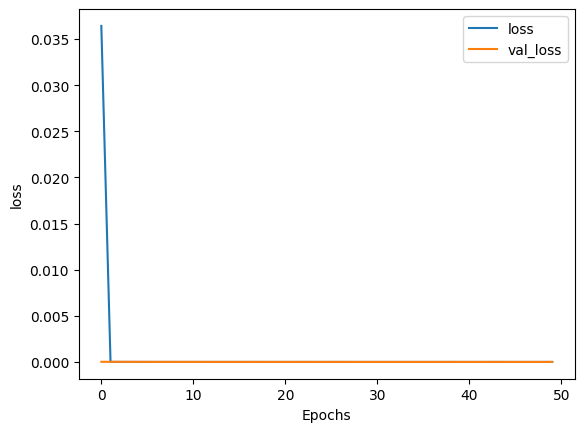

In [7]:
plt.plot(met_df['loss'], label = 'loss')
plt.plot(met_df['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

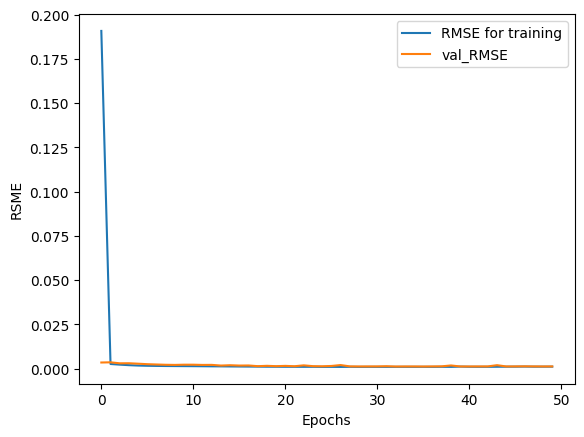

In [8]:
plt.plot(met_df['root_mean_squared_error'], label = 'RMSE for training')
plt.plot(met_df['val_root_mean_squared_error'], label = 'val_RMSE')
plt.xlabel('Epochs')
plt.ylabel('RSME')
plt.legend()

In [11]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['DTG ']

X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
predictions = model.predict(X_val) 
prediction = pd.DataFrame(predictions)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

13/13 [==============================] - 0s 2ms/step


,time,tem,heating rate,preditions,DTG
0,0.000015,0.066519,0.997785,-0.000092,0.000023
1,0.000412,0.344255,0.938876,-0.000400,0.000111
2,0.001151,0.544988,0.838443,-0.000585,0.000173


In [12]:
print('MSE',mean_squared_error(y_val,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions)))
print('MAE',mean_absolute_error(y_val,predictions))
print('R2_Score',r2_score(y_val,predictions))

MSE 6.1803794820133146e-06
RMSE 0.002486036902785901
MAE 0.0007231441414838573
R2_Score -0.09107426170061506


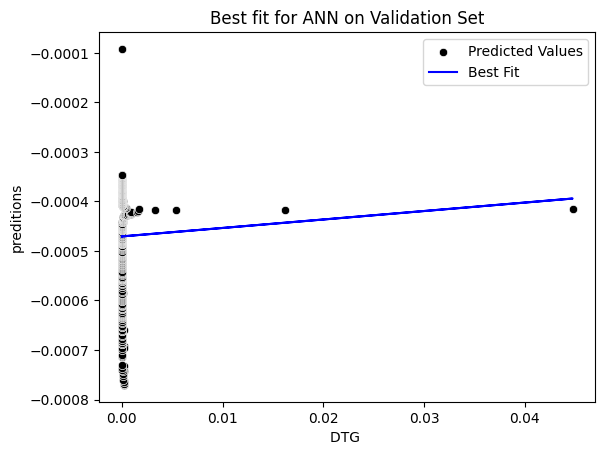

In [15]:
x = final_df['DTG ']
y = final_df['preditions']
a,b = np.polyfit(x,y,1)
sns.scatterplot(data=final_df, x='DTG ', y='preditions', color='black', label='Predicted Values')
plt.plot(x, a*x+b, color='blue', label = 'Best Fit') 
plt.title('Best fit for ANN on Validation Set')
plt.legend()

In [17]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['DTG ']

predictions = model.predict(X_test)  
prediction_test  = pd.DataFrame(predictions)
print('MSE',mean_squared_error(y_test,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions)))
print('MAE',mean_absolute_error(y_test,predictions))
print('R2_Score',r2_score(y_test,predictions))

13/13 [==============================] - 0s 4ms/step
MSE 4.895968419084011e-07
RMSE 0.000699711970676793
MAE 0.0005740076392406667
R2_Score -2.27978904736394


In [18]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,DTG
0,9.122055e-07,0.016664,0.999861,0.001693,0.000006
1,7.300459e-05,0.148340,0.988936,-0.000188,0.000048
2,1.285670e-04,0.196116,0.980581,-0.000242,0.000062
3,3.446661e-04,0.316228,0.948683,-0.000371,0.000103
4,5.231837e-04,0.384615,0.923077,-0.000440,0.000122
...,...,...,...,...,...
401,6.901026e-02,0.997501,0.015114,-0.000347,0.000000
402,6.913824e-02,0.997494,0.015007,-0.000347,0.000000
403,6.914473e-02,0.997494,0.015004,-0.000347,0.000000
404,6.915051e-02,0.997493,0.015000,-0.000347,0.000000


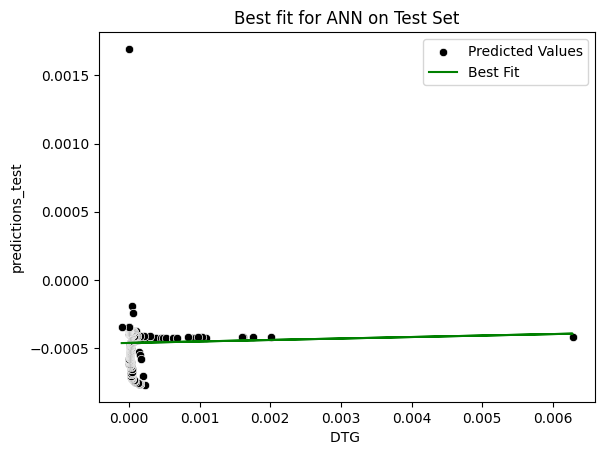

In [21]:
x = final_df_test['DTG ']
y = final_df_test['predictions_test']
a,b = np.polyfit(x,y,1)
sns.scatterplot(data=final_df_test, x='DTG ', y='predictions_test', color='black', label='Predicted Values')
plt.plot(x, a*x+b, color='green', label = 'Best Fit') 
plt.title('Best fit for ANN on Test Set')
plt.legend()

In [22]:
from tensorflow.keras.utils import plot_model

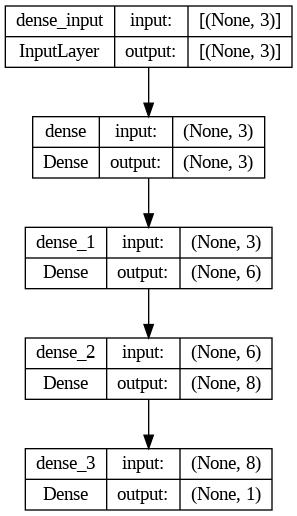

In [23]:
plot_model(model, to_file='/content/model.jpg',show_shapes=True)